Only Yuan should make changes for this file. 

Since the data we have has a missing chunck starting 2016-12-31 and ending 2017-07-05, we will simply take the data prior to 2016-12-31 as the validation set and the data post 2017-07-05 as the tt set within the training set. 

For this file, we only look at the daily no inflation file. And we will attempt fitting a recurrent neural network. 

In [3]:
import pandas as pd

In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import torch
import keras
import numpy as np

In [12]:
all_data = pd.read_csv("../../data/processed/all_data_inf_adj_collection.csv")

In [13]:
all_data

,Unnamed: 0,Date,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,...,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,tech_index_20days_prior_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,0,2014-01-02,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014-01-03,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2014-01-06,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2014-01-07,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2014-01-08,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2563,2024-10-24,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.186840,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2564,2024-10-25,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.039159,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2565,2024-10-28,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.764371,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2566,2024-10-29,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,3.462442,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


In [14]:
all_data.columns

Index(['Unnamed: 0', 'Date', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [15]:
all_data=all_data.drop("Unnamed: 0",axis=1)

In [16]:
all_data=all_data.reindex(columns=['Date', 
       'tech_index_20days_prior_pro_change_inf_adj',
       'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'])

In [17]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,ppi516_monthly_pro_change_inf_adj,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


We will want to utilize the timeseries nature of data, so I will shift the training target by 20 and include it as a parameter within the training. 

In [18]:
import sys 
sys.path.append("../../")

In [19]:
from proj_mod import data_shifting, drop_extreme

In [21]:
all_data=data_shifting.shifter(df_in=all_data,str_col="tech_index_20days_prior_pro_change_inf_adj", int_shift=20)

In [22]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,...,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj,tech_index_20days_prior_pro_change_inf_adj_shifted_by_20
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874,2.547187
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282,3.016703
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477,4.108995
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923,1.675397


In [23]:
all_data_tt=all_data[(all_data["Date"]>"2017-07-05")&(all_data["Date"]<"2024-01-01")]
all_data_val=all_data[all_data["Date"]<"2016-12-31"]
all_data_test=all_data[all_data["Date"]>="2024-01-01"]
all_data_tt=all_data_tt.dropna().reset_index(drop=True)
all_data_val=all_data_val.dropna().reset_index(drop=True)
all_data_test=all_data_test.dropna().reset_index(drop=True)

In [66]:
all_data_tt_de=drop_extreme.drop_by_sort(df_in=all_data_tt,fl_high=0.999,fl_low=0.001).reset_index(drop=True)

We need to create the data X and y, each "row" of X should be an array of form $(x_{t-(n-1)*20},\cdots, x_{t-1*20},x_t)$, and each "row" of y should be $y_t$. 

Each $x_t$ should be of form $(\text{parameters}, y_{t-20})$. 

In [67]:
X_tt_pre=all_data_tt.iloc[:,2:]
y_tt_pre=all_data_tt.iloc[:,[1]]
X_val_pre=all_data_val.iloc[:,2:]
y_val_pre=all_data_val.iloc[:,[1]]
X_test_pre=all_data_test.iloc[:,2:]
y_test_pre=all_data_test.iloc[:,[1]]
X_tt_de_pre=all_data_tt.iloc[:,2:]
y_tt_de_pre=all_data_tt.iloc[:,[1]]

In [39]:
from proj_mod import data_proc_nn

In [72]:
X_tt,y_tt=data_proc_nn.create_data_RNN(df_X_in=X_tt_pre, df_y_in=y_tt_pre, int_lag=6, int_jump=20)
y_tt=torch.from_numpy(y_tt)
X_tt=torch.from_numpy(X_tt)
# X_tt_de,y_tt_de=data_proc_nn.create_data_RNN(df_X_in=X_tt_de_pre, df_y_in=y_tt_de_pre, int_lag=6, int_jump=20)
# y_tt=torch.from_numpy(y_tt)
# X_tt=torch.from_numpy(X_tt)
X_val,y_val=data_proc_nn.create_data_RNN(df_X_in=X_val_pre,df_y_in=y_val_pre,int_lag=6, int_jump=20)
X_val=torch.from_numpy(X_val)
y_val=torch.from_numpy(y_val)
X_test,y_test=data_proc_nn.create_data_RNN(df_X_in=X_test_pre,df_y_in=y_test_pre,int_lag=6, int_jump=20)
X_test=torch.from_numpy(X_test)
y_test=torch.from_numpy(y_test)

In [30]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [31]:
import matplotlib.pyplot as plt

In [68]:
del model

In [126]:
model=models.Sequential(
    [
    layers.BatchNormalization(axis=2),
    layers.SimpleRNN(return_sequences=False, units=128),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=8), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation="linear")]
)
model.compile(loss="mean_squared_error",metrics=["mse"])
history = model.fit(X_tt, y_tt,
                    epochs = 200,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 41.9528 - mse: 41.9528 - val_loss: 16.7785 - val_mse: 16.7785
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 39.1998 - mse: 39.1998 - val_loss: 15.7278 - val_mse: 15.7278
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 36.5375 - mse: 36.5375 - val_loss: 17.5927 - val_mse: 17.5927
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 37.8263 - mse: 37.8263 - val_loss: 19.9958 - val_mse: 19.9958
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 38.1663 - mse: 38.1663 - val_loss: 29.2942 - val_mse: 29.2942
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35.9684 - mse: 35.9684 - val_loss: 42.4995 - val_mse: 42.4995
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 32.4951 - mse: 32.4951 - val_loss: 51.3993 - val_mse: 51.3993
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 31.5027 - mse: 31.5027 - val_loss: 72.4809 - val_mse: 72.4809
Epoch 9/200
13/13 ━━━━━━

In [127]:
history_dict=history.history

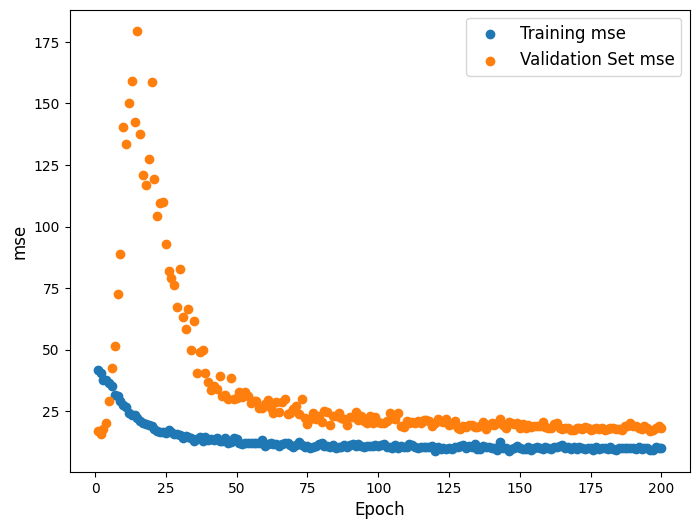

In [128]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,200+1), history_dict['mse'], label = "Training mse")
plt.scatter(range(1,200+1), history_dict['val_mse'], label = "Validation Set mse")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("mse", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

In [129]:
model=models.Sequential(
    [
    layers.BatchNormalization(axis=2),
    layers.SimpleRNN(return_sequences=False, units=128),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=8), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation="linear")]
)
model.compile(loss="mean_squared_error",metrics=["mse"])
history = model.fit(X_tt, y_tt,
                    epochs = 190,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 43.9562 - mse: 43.9562 - val_loss: 13.9287 - val_mse: 13.9287
Epoch 2/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 40.0090 - mse: 40.0090 - val_loss: 13.8862 - val_mse: 13.8862
Epoch 3/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 41.5117 - mse: 41.5117 - val_loss: 13.8795 - val_mse: 13.8795
Epoch 4/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 36.9914 - mse: 36.9914 - val_loss: 14.0812 - val_mse: 14.0812
Epoch 5/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 39.8250 - mse: 39.8250 - val_loss: 15.1066 - val_mse: 15.1066
Epoch 6/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 38.6682 - mse: 38.6682 - val_loss: 17.5094 - val_mse: 17.5094
Epoch 7/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 35.3520 - mse: 35.3520 - val_loss: 20.0919 - val_mse: 20.0919
Epoch 8/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35.9258 - mse: 35.9258 - val_loss: 29.4701 - val_mse: 29.4701
Epoch 9/190
13/13 ━━━━━━

In [130]:
pred=model.predict(x=X_test)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [131]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred=pred, y_true=y_test)

4.349487781524658

<function matplotlib.pyplot.show(close=None, block=None)>

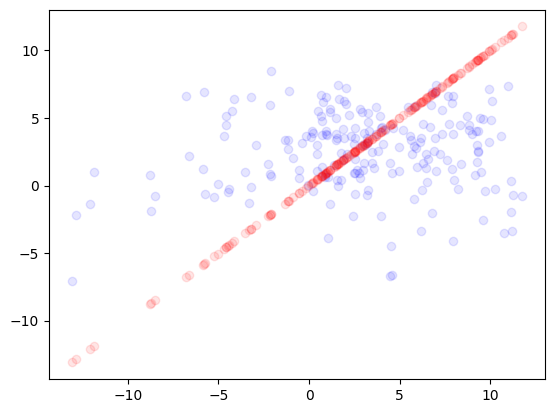

In [132]:
plt.scatter(x=y_test,y=pred,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

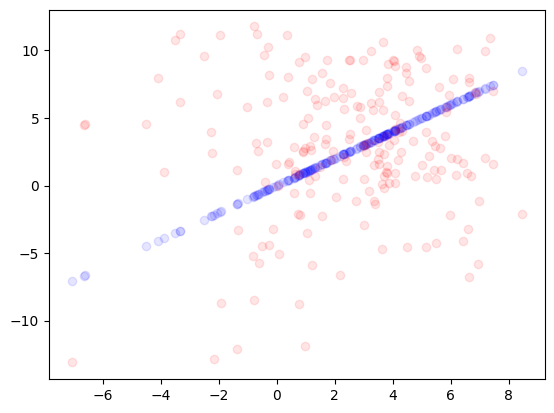

In [133]:
plt.scatter(x=pred,y=pred,c="b",alpha=0.1,label="pred")
plt.scatter(x=pred,y=y_test,c="r",alpha=0.1,label="true")
plt.show